##Import Required Libraries

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix

#Example 1

##Load and Prepare the Data

In [88]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, centers=1, cluster_std=0.5, random_state=42)

outliers = np.random.uniform(low=-6, high=6, size=(50, 2))
X = np.concatenate([X, outliers])
y = np.concatenate([np.zeros(1000), np.ones(50)])  # 0: normal, 1: outlier

##Visualize the Data

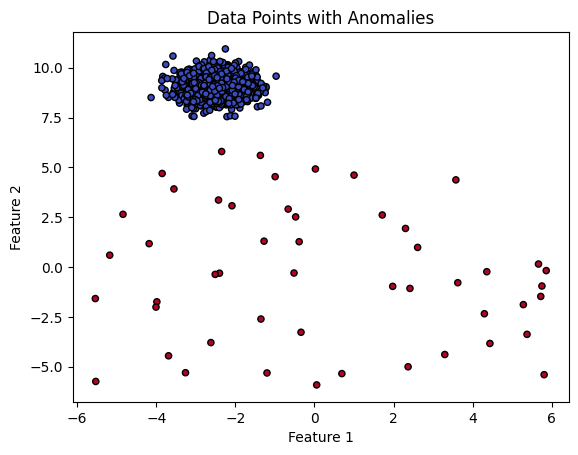

In [89]:
#y จะใช้ตอน evaluate อย่างเดียว
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=20)
plt.title('Data Points with Anomalies')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### IsolationForest

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1000
         1.0       0.92      0.98      0.95        50

    accuracy                           1.00      1050
   macro avg       0.96      0.99      0.97      1050
weighted avg       1.00      1.00      1.00      1050

[[996   4]
 [  1  49]]


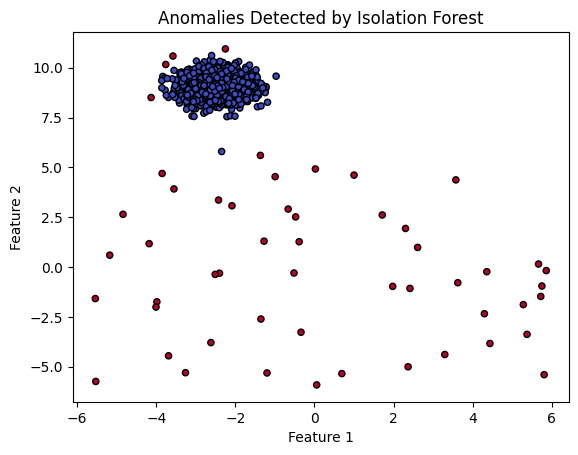

In [90]:
from sklearn.ensemble import IsolationForest

scaler = MinMaxScaler()
iso_forest = IsolationForest(contamination=0.05, random_state=42)
y_pred = iso_forest.fit_predict(scaler.fit_transform(X))

y_pred = np.where(y_pred == -1, 1, 0)

print(classification_report(y, y_pred))
print(confusion_matrix(y, y_pred))

plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='coolwarm', edgecolor='k', s=20)
plt.title('Anomalies Detected by Isolation Forest')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### One-class SVM

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98      1000
         1.0       0.51      0.54      0.52        50

    accuracy                           0.95      1050
   macro avg       0.74      0.76      0.75      1050
weighted avg       0.95      0.95      0.95      1050

[[974  26]
 [ 23  27]]


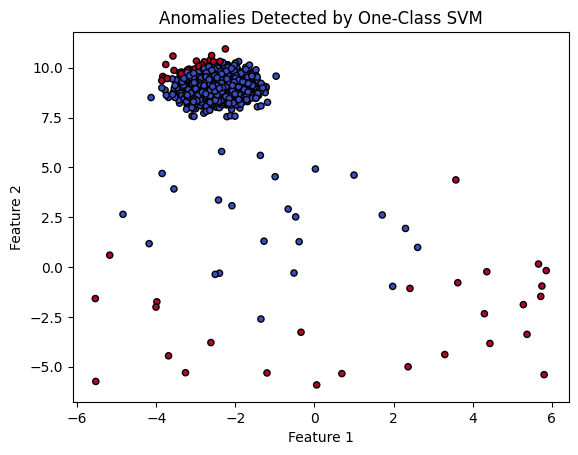

In [91]:
from sklearn.svm import OneClassSVM

scaler = MinMaxScaler()
oc_svm = OneClassSVM(nu=0.05, gamma='auto')
y_pred = oc_svm.fit_predict(scaler.fit_transform(X))

# Convert predictions to binary (1 for anomaly, 0 for normal)
y_pred = np.where(y_pred == -1, 1, 0)

print(classification_report(y, y_pred))
print(confusion_matrix(y, y_pred))

plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='coolwarm', edgecolor='k', s=20)
plt.title('Anomalies Detected by One-Class SVM')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Example 2

## Create the training normal data

In [92]:
# Parameters
n_samples = 1000  # Number of normal points
n_anomalies = 50  # Number of anomalies
n_dimensions = 40  # Number of features

X_normal = np.random.normal(0, 1, size=(n_samples, n_dimensions))

## Create PCA to learn the training dataset

In [93]:
from sklearn.decomposition import PCA

scaler = MinMaxScaler()
X_normal = scaler.fit_transform(X_normal)

pca = PCA(n_components=30)
pca.fit(X_normal)

PCA(n_components=30)

## Calculate the trashold value based on the reconstruction data and the input data

In [94]:
X_pred = pca.inverse_transform(pca.transform(X_normal))

reconstruction_error = np.mean(np.power(X_pred - X_normal, 2), axis=1)

threshold = np.percentile(reconstruction_error, 95)
# threshold = reconstruction_error.max()
print(f"Reconstruction error threshold: {threshold}")

Reconstruction error threshold: 0.007312399766666354


## Create the testing data with anomalies

In [95]:
# Parameters
n_samples = 1000  # Number of normal points
n_anomalies = 50  # Number of anomalies
n_dimensions = 40  # Number of features

X_normal = np.random.normal(0, 1, size=(n_samples, n_dimensions))
X_anomaly = np.random.normal(10, 1, size=(n_anomalies, n_dimensions))

# Labels: 0 for normal, 1 for anomalies
y_normal = np.zeros(n_samples)
y_anomaly = np.ones(n_anomalies)

X_test = np.vstack([X_normal, X_anomaly])
y_test = np.hstack([y_normal, y_anomaly])

## Predict on the testing data and identify anomalies

In [96]:
X_test = scaler.transform(X_test)

X_pred = pca.inverse_transform(pca.transform(X_test))

reconstruction_error = np.mean(np.power(X_pred - X_test, 2), axis=1)

y_pred = np.where(reconstruction_error > threshold, 1, 0)

## Evaluate the results

In [97]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.85      0.92      1000
         1.0       0.25      1.00      0.40        50

    accuracy                           0.85      1050
   macro avg       0.62      0.92      0.66      1050
weighted avg       0.96      0.85      0.89      1050

[[847 153]
 [  0  50]]


# Workshop 1: Anomaly detection using autoencoder

In [98]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [99]:
# Parameters
n_samples = 1000  # Number of normal points
n_anomalies = 50  # Number of anomalies
n_dimensions = 40  # Number of features

X_normal = np.random.normal(0, 1, size=(n_samples, n_dimensions))

# Parameters
n_samples = 1000  # Number of normal points
n_anomalies = 50  # Number of anomalies
n_dimensions = 40  # Number of features

X_normal = np.random.normal(0, 1, size=(n_samples, n_dimensions))
X_anomaly = np.random.normal(10, 1, size=(n_anomalies, n_dimensions))

# Labels: 0 for normal, 1 for anomalies
y_normal = np.zeros(n_samples)
y_anomaly = np.ones(n_anomalies)

X_test = np.vstack([X_normal, X_anomaly])
y_test = np.hstack([y_normal, y_anomaly])

In [100]:
class Autoencoder(nn.Module):
    def __init__(self,**kwargs):
        super(Autoencoder,self).__init__(**kwargs)

        self.encoder = nn.Sequential(
            nn.Linear(n_dimensions, n_dimensions-10),
        )
        self.decoder = nn.Sequential(
            nn.Linear(n_dimensions-10, n_dimensions),
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        # x = F.sigmoid(x)
        return x

In [101]:
def train_autoencoder(X, model, epochs = 100):
  X_tensor = torch.tensor(X, dtype=torch.float32)
  model = model
  optimizer = optim.Adam(model.parameters())
  criterion = nn.MSELoss()
  for epoch in range(epochs):
    # Forward
    outputs = model(X_tensor)
    loss = criterion(outputs, X_tensor)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
      print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}')

  return model


In [109]:

model = Autoencoder()
model = train_autoencoder(X_normal, model, epochs = 1000)


Epoch 10/1000, Loss: 1.0116
Epoch 20/1000, Loss: 0.9206
Epoch 30/1000, Loss: 0.8402
Epoch 40/1000, Loss: 0.7680
Epoch 50/1000, Loss: 0.7024
Epoch 60/1000, Loss: 0.6425
Epoch 70/1000, Loss: 0.5876
Epoch 80/1000, Loss: 0.5373
Epoch 90/1000, Loss: 0.4912
Epoch 100/1000, Loss: 0.4492
Epoch 110/1000, Loss: 0.4112
Epoch 120/1000, Loss: 0.3772
Epoch 130/1000, Loss: 0.3474
Epoch 140/1000, Loss: 0.3215
Epoch 150/1000, Loss: 0.2995
Epoch 160/1000, Loss: 0.2810
Epoch 170/1000, Loss: 0.2657
Epoch 180/1000, Loss: 0.2534
Epoch 190/1000, Loss: 0.2436
Epoch 200/1000, Loss: 0.2362
Epoch 210/1000, Loss: 0.2306
Epoch 220/1000, Loss: 0.2266
Epoch 230/1000, Loss: 0.2237
Epoch 240/1000, Loss: 0.2216
Epoch 250/1000, Loss: 0.2199
Epoch 260/1000, Loss: 0.2184
Epoch 270/1000, Loss: 0.2172
Epoch 280/1000, Loss: 0.2161
Epoch 290/1000, Loss: 0.2150
Epoch 300/1000, Loss: 0.2140
Epoch 310/1000, Loss: 0.2130
Epoch 320/1000, Loss: 0.2121
Epoch 330/1000, Loss: 0.2112
Epoch 340/1000, Loss: 0.2103
Epoch 350/1000, Loss: 0

In [110]:
X_normal_tensor = torch.tensor(X_normal, dtype=torch.float32)
X_pred = model(X_normal_tensor).detach().numpy()

reconstruction_error = np.mean(np.power(X_pred - X_normal, 2), axis=1)

threshold = np.percentile(reconstruction_error, 95)
# threshold = reconstruction_error.max()
print(f"Reconstruction error threshold: {threshold}")

Reconstruction error threshold: 0.3397765075820722


In [111]:
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
X_pred = model(X_test_tensor).detach().numpy()

reconstruction_error = np.mean(np.power(X_pred - X_test, 2), axis=1)

y_pred = np.where(reconstruction_error > threshold, 1, 0)

In [112]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97      1000
         1.0       0.50      1.00      0.67        50

    accuracy                           0.95      1050
   macro avg       0.75      0.97      0.82      1050
weighted avg       0.98      0.95      0.96      1050

[[950  50]
 [  0  50]]


#Workshop 2: Time-series anomaly detection

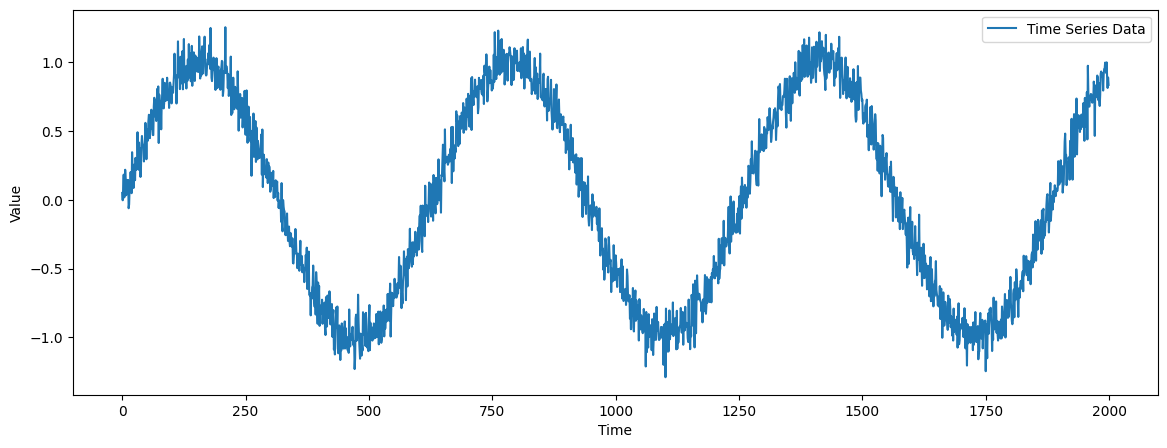

In [113]:
np.random.seed(42)
time_steps = 2000
time = np.arange(time_steps)
data = np.sin(0.01 * time) + np.random.normal(0, 0.1, time_steps)

df_train = pd.DataFrame(data, columns=['value'])
df_train['time'] = time
df_train.set_index('time', inplace=True)

plt.figure(figsize=(14, 5))
plt.plot(df_train.index, df_train['value'], label='Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

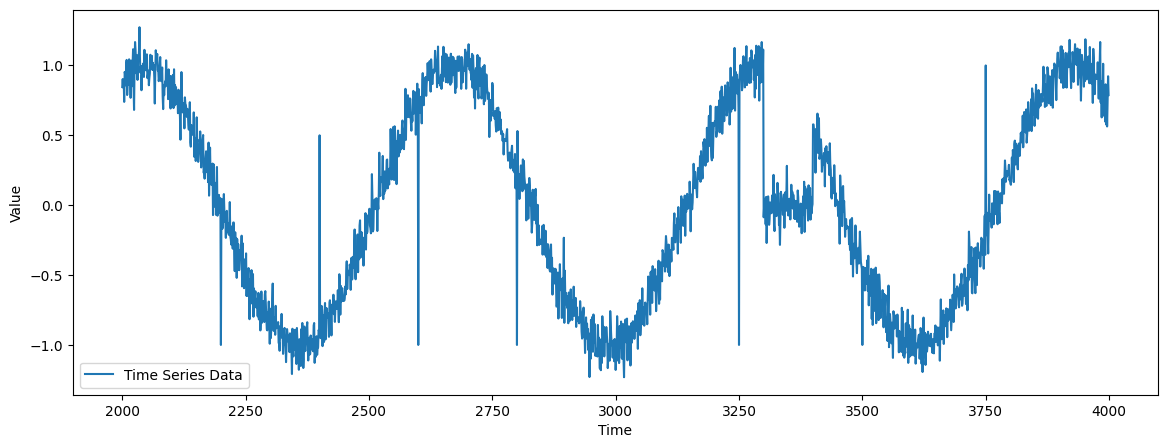

In [114]:
next_steps = 2000
time = np.arange(time_steps,time_steps+next_steps)
data = np.sin(0.01 * time) + np.random.normal(0, 0.1, len(time))

# Anomaly
data[200] = -1
data[400] = 0.5
data[600] = -1
data[800] = -1
data[1250] = -1
data[1500] = -1
data[1750] = 1
tmp = data[1300]
data[1300:1400] = np.random.normal(0, 0.1, len(data[1300:1400]))

df_test = pd.DataFrame(data, columns=['value'])
df_test['time'] = time
df_test.set_index('time', inplace=True)

plt.figure(figsize=(14, 5))
plt.plot(df_test.index, df_test['value'], label='Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [220]:
class Autoencoder(nn.Module):
    def __init__(self,**kwargs):
        super(Autoencoder,self).__init__(**kwargs)

        self.encoder = nn.Sequential(
            nn.Linear(11, 1),
        )
        self.decoder = nn.Sequential(
            nn.Linear(1, 11),
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        # x = F.sigmoid(x)
        return x

In [221]:
def create_lagged_features(df, windows=1, step=1):
    df_lagged = df.copy()
    for i in range(1, windows + step):
        df_lagged[f'day_{windows-i+step}'] = df['value'].shift(i)
    df_lagged.dropna(inplace=True)
    df_lagged = df_lagged.iloc[:,::-1]
    return df_lagged.iloc[:, :-step].join(df_lagged[['value']])

In [222]:
window = 10
step = 1
df_train_lagged = create_lagged_features(df_train, windows=window, step=step)
df_test_lagged = create_lagged_features(df_test, windows=window, step=step)


In [223]:
model = Autoencoder()
model = train_autoencoder(df_train_lagged.values, model, epochs = 1000)

Epoch 10/1000, Loss: 0.9051
Epoch 20/1000, Loss: 0.8666
Epoch 30/1000, Loss: 0.8349
Epoch 40/1000, Loss: 0.8094
Epoch 50/1000, Loss: 0.7887
Epoch 60/1000, Loss: 0.7714
Epoch 70/1000, Loss: 0.7566
Epoch 80/1000, Loss: 0.7432
Epoch 90/1000, Loss: 0.7308
Epoch 100/1000, Loss: 0.7188
Epoch 110/1000, Loss: 0.7069
Epoch 120/1000, Loss: 0.6951
Epoch 130/1000, Loss: 0.6830
Epoch 140/1000, Loss: 0.6706
Epoch 150/1000, Loss: 0.6577
Epoch 160/1000, Loss: 0.6444
Epoch 170/1000, Loss: 0.6305
Epoch 180/1000, Loss: 0.6160
Epoch 190/1000, Loss: 0.6010
Epoch 200/1000, Loss: 0.5856
Epoch 210/1000, Loss: 0.5697
Epoch 220/1000, Loss: 0.5536
Epoch 230/1000, Loss: 0.5373
Epoch 240/1000, Loss: 0.5209
Epoch 250/1000, Loss: 0.5045
Epoch 260/1000, Loss: 0.4883
Epoch 270/1000, Loss: 0.4722
Epoch 280/1000, Loss: 0.4565
Epoch 290/1000, Loss: 0.4410
Epoch 300/1000, Loss: 0.4259
Epoch 310/1000, Loss: 0.4111
Epoch 320/1000, Loss: 0.3968
Epoch 330/1000, Loss: 0.3828
Epoch 340/1000, Loss: 0.3692
Epoch 350/1000, Loss: 0

In [230]:
df_train_tensor = torch.tensor(df_train_lagged.values, dtype=torch.float32)
X_pred = model(df_train_tensor).detach().numpy()

reconstruction_error = np.mean(np.power(X_pred - df_train_lagged.values, 2), axis=1)

threshold = np.percentile(reconstruction_error, 99)
# threshold = reconstruction_error.max()
print(f"Reconstruction error threshold: {threshold}")

Reconstruction error threshold: 0.03424653537634052


In [231]:
X_test_tensor = torch.tensor(df_test_lagged.values, dtype=torch.float32)
X_pred = model(X_test_tensor).detach().numpy()

reconstruction_error = np.mean(np.power(X_pred - df_test_lagged.values, 2), axis=1)

y_pred = np.where(reconstruction_error > threshold, 1, 0)

In [232]:
y_pred.sum()

112